# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0.0,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.8,3,1,0,113931.57
3,699,France,Female,39,1,0.0,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.0,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.0,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
pd.DataFrame(y)

,0
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,France,0,42,2,0.0,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.8,3,1,0,113931.57
3,699,France,0,39,1,0.0,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.0,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.0,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
print("X_train_shape = {}".format(X_train.shape))
print("X_test_shape = {}".format(X_test.shape))
print("y_train_shape = {}".format(y_train.shape))
print("y_test_shape = {}".format(y_test.shape))

X_train_shape = (8000, 12)
X_test_shape = (2000, 12)
y_train_shape = (8000,)
y_test_shape = (2000,)


### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.014607,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-1.014607,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,0.985604,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,-1.014607,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-1.014607,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,-1.014607,1.754865,-0.573694,-0.582970,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,-1.014607,-0.569844,1.743090,1.478815,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.985604,-0.569844,-0.573694,0.901515,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-1.014607,-0.569844,1.743090,-0.624205,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


## Part 2 - Building the ANN

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [20]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5397 - accuracy: 0.7834
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4547 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7958
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4353 - accuracy: 0.7975
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.7995
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8071
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8148
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8205
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4027 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [21]:
(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 124ms/step


array([[False]])

In [22]:
print('Hola {}'.format(1))

Hola 1


In [23]:
print(  '''
            Geography: France
            Credit Score: 600
            Gender: Male
            Age: 40 years old
            Tenure: 3 years
            Balance: $ 60000
            Number of Products: 2
            Does this customer have a credit card ? Yes
            Is this customer an Active Member: Yes
            Estimated Salary: $ 50000   
            Exited: {}'''
            .format((ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)[0][0]))

1/1 [==============================] - 0s 16ms/step

            Geography: France
            Credit Score: 600
            Gender: Male
            Age: 40 years old
            Tenure: 3 years
            Balance: $ 60000
            Number of Products: 2
            Does this customer have a credit card ? Yes
            Is this customer an Active Member: Yes
            Estimated Salary: $ 50000   
            Exited: False


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [24]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred.ravel().astype('int32')})

63/63 [==============================] - 0s 873us/step


,y_test,y_pred
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,0


### Making the Confusion Matrix

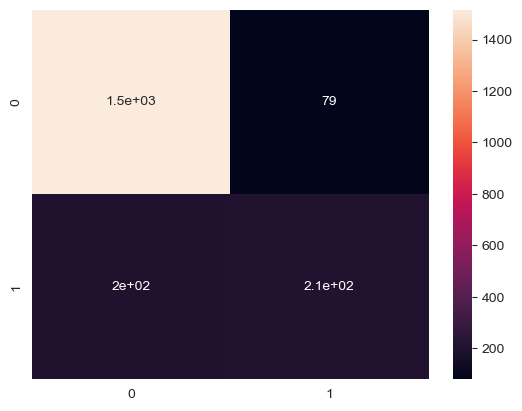

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True);

In [26]:
accuracy_score(y_test, y_pred)

0.862